In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
cust_acq=pd.read_csv('Customer Acqusition.csv')
spend=pd.read_csv('spend.csv')
repayment=pd.read_csv('Repayment.csv')

In [7]:
print(cust_acq.dtypes)
print('\n spend')
print(spend.dtypes)
print('\n repayment')
print(repayment.dtypes)

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

 spend
Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

 repayment
SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object


In [8]:
cust_acq.head(3)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt


In [9]:
spend.head(3)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46


In [10]:
repayment.head(3)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN


In [11]:
print(cust_acq.shape)
print(spend.shape)
print(repayment.shape)


(100, 8)
(1500, 5)
(1523, 5)


In [12]:
# 1. In the above dataset,
# a. In case age is less than 18, replace it with mean of age values.

cust_acq.loc[cust_acq.Age<18,'Age']=cust_acq.Age.mean()


In [13]:
cust_acq.loc[cust_acq.Age<18,['Age']]
#Retruns no customer is less than the 18 years of age

,Age


In [14]:
# b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
# (customer’s limit provided in acquisition table is the per transaction limit on his card)

# merge the customer and spend df
cust_limt_vs_spend=pd.merge(left=cust_acq,right=spend,left_on='Customer',right_on='Customer',how='right')
cust_limt_vs_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80
1,1,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13
2,1,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46
3,1,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47
4,1,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,67,A67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary,1496,4-Feb-06,BUS TICKET,356872.73
1496,68,A68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed,1497,25-Mar-06,BUS TICKET,204971.10
1497,69,A69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed,1498,31-Mar-06,BUS TICKET,50449.44
1498,70,A70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed,1499,23-Mar-06,BUS TICKET,80593.94


In [15]:
#check which records have amount spent is more than the limit
cust_limt_vs_spend.loc[cust_limt_vs_spend.Amount>cust_limt_vs_spend.Limit]

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
7,8,A8,67.00,PATNA,Silver,100002.0,C8,Salaried_Pvt,8,5-Feb-04,BIKE,155562.58
18,19,A19,27.00,BANGALORE,Platimum,10000.0,C19,Salaried_Pvt,19,4-Apr-05,FOOD,441442.26
19,20,A20,27.00,CALCUTTA,Platimum,10001.0,C20,Govt,20,30-Apr-06,JEWELLERY,356733.48
20,21,A21,57.00,COCHIN,Platimum,10002.0,C21,Normal Salary,21,25-Apr-04,PETRO,190011.63
21,22,A22,27.00,BOMBAY,Silver,100000.0,C22,Self Employed,22,19-Apr-06,CLOTHES,423672.50
...,...,...,...,...,...,...,...,...,...,...,...,...
1485,59,A59,74.00,BANGALORE,Silver,100003.0,C21,Normal Salary,1486,15-Jan-04,FOOD,181115.20
1496,68,A68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed,1497,25-Mar-06,BUS TICKET,204971.10
1497,69,A69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed,1498,31-Mar-06,BUS TICKET,50449.44
1498,70,A70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed,1499,23-Mar-06,BUS TICKET,80593.94


In [16]:
# set the these amount half of their credit limit 
cust_limt_vs_spend.loc[cust_limt_vs_spend.Amount>cust_limt_vs_spend.Limit,'Amount']=cust_limt_vs_spend.Limit/2


In [17]:
#Crosscheck to ensure that No records have amount spent is more than the limit
cust_limt_vs_spend.loc[cust_limt_vs_spend.Amount>cust_limt_vs_spend.Limit,'Amount']

Series([], Name: Amount, dtype: float64)

In [18]:
# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

#merge the customer df and repayment df 

cust_repay=pd.merge(left=cust_acq,right=repayment,on='Customer', how='right')
cust_repay

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4
0,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN
1,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,NaN
2,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06,NaN
3,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12,NaN
4,1.0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# check the records which have repayment amount more than the limit
cust_repay.loc[cust_repay.Amount>cust_repay.Limit,['Amount']]

,Amount
7,156913.59
8,417294.81
17,213352.06
18,347826.27
19,471099.22
...,...
1483,207786.09
1496,319836.49
1497,247628.45
1498,454016.51


In [20]:
# set these records with their limit.
cust_repay.loc[cust_repay.Amount>cust_repay.Limit,'Amount']=cust_repay.Limit

In [21]:
# croscheck the records to ensure that none of the repayment amount more than the limit
cust_repay.loc[cust_repay.Amount>cust_repay.Limit,['Amount']]

,Amount


In [22]:
# Same number of records set to Limit 
cust_repay.loc[cust_repay.Amount==cust_repay.Limit,['Limit','Amount']]

,Limit,Amount
7,100002.0,100002.0
8,100003.0,100003.0
17,100000.0,100000.0
18,10000.0,10000.0
19,10001.0,10001.0
...,...,...
1483,100001.0,100001.0
1496,100000.0,100000.0
1497,10000.0,10000.0
1498,10001.0,10001.0


In [23]:
# 2. From the above dataset create the following summaries:
# a. How many distinct customers exist?

cust_acq['Customer'].nunique(dropna=True)

100

In [24]:
# b. How many distinct categories exist?
cust_acq.groupby(by='Segment')[['Segment']].count()

,Segment
Segment,
Govt,29
Normal Salary,22
Salaried_MNC,13
Salaried_Pvt,13
Self Employed,23


In [25]:
# c. What is the average monthly spend by customers?

# convert the Month column to date format

spend.Month=pd.to_datetime(spend.Month)

# get the month and year
spend['monthly']=spend['Month'].apply(lambda x: pd.Timestamp.strftime(x,format="%m-%Y"))

# get the monthly wise amount
spend.groupby(by=['monthly'])[['Amount']].mean().round(2)


,Amount
monthly,
01-2004,251712.07
01-2005,292741.37
01-2006,282058.01
02-2004,221215.27
02-2005,229802.28
02-2006,253858.26
03-2004,232146.12
03-2006,247166.08
04-2004,235272.04


In [26]:
# d. What is the average monthly repayment by customers?

repayment.Month=pd.to_datetime(repayment.Month)

# add column with month and year value
repayment['Monthly']=repayment['Month'].dropna().apply(lambda x : pd.Timestamp.strftime(x, format="%m-%Y"))

#average monthly repayment by customers
repayment.groupby(by='Monthly')[['Amount']].mean().round(2)

,Amount
Monthly,
01-2004,243489.65
01-2005,240548.10
01-2006,293475.39
02-2004,256702.63
02-2005,238829.27
02-2006,284489.57
03-2004,252585.28
03-2006,240851.27
04-2004,259141.68


In [27]:
# e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
# (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment– Monthly spend.
# Interest is earned only on positive profits and not on negative amounts)

# merge the customer , spend and repayment df 
customer_spend_repay = pd.merge(left=cust_limt_vs_spend,right=repayment,on="Customer",suffixes=('_spend','_repay') ,how="inner")

# calculate the profit amount
customer_spend_repay['Monthly_Profit']=customer_spend_repay.Amount_repay-customer_spend_repay.Amount_spend

# calculate the profit percentage negating the negative amounts 
customer_spend_repay['profit_percentage']=(customer_spend_repay.loc[customer_spend_repay.Monthly_Profit>0,['Monthly_Profit']])*2.9/100

# show the monthwise profit amount and percentage
customer_spend_repay.groupby(by='Monthly')[['Amount_spend','Amount_repay','profit_percentage']].sum().round(2)


,Amount_spend,Amount_repay,profit_percentage
Monthly,,,
01-2004,1.088357e+09,1.699210e+09,27701055.07
01-2005,1.324129e+08,1.810333e+08,2631209.42
01-2006,5.127574e+07,8.974491e+07,1435163.02
02-2004,7.613922e+07,1.602419e+08,3207096.13
02-2005,5.890557e+08,9.416163e+08,15339521.71
02-2006,1.654843e+08,2.903280e+08,4712698.36
03-2004,5.594171e+07,8.974470e+07,1430016.74
03-2006,7.393854e+08,1.115725e+09,18429814.81
04-2004,1.194516e+08,2.285403e+08,3772489.79


In [28]:
# f. What are the top 5 product types?
#round(customer_spend_repay.groupby(by='Type')[['Amount_spend']].sum()).sort_values(by='Amount_spend',ascending=False)


round(spend.groupby(by='Type')[['Amount']].sum(),2).sort_values(by='Amount',ascending=False).head(5)


,Amount
Type,
PETRO,49863174.09
CAMERA,41481571.96
FOOD,37773338.43
TRAIN TICKET,33067077.15
AIR TICKET,32955445.42


In [29]:
# g. Which city is having maximum spend?


round(cust_limt_vs_spend.groupby(by='City')[['Amount']].sum(),2).sort_values(by='Amount',ascending=False)

,Amount
City,
COCHIN,45963513.50
CALCUTTA,41108132.30
BANGALORE,40461647.02
BOMBAY,28603127.38
CHENNAI,22128635.65
TRIVANDRUM,15337155.87
PATNA,15260586.97
DELHI,10918286.54


In [30]:
# h. Which age group is spending more money?

In [31]:
round(cust_limt_vs_spend.groupby(by='Age')[['Amount']].sum(),2).reset_index().sort_values(by='Amount',ascending=False)

,Age,Amount
6,28.00,17365270.23
22,46.49,15872551.38
50,78.00,12329508.54
14,37.00,9992645.71
3,25.00,9749700.72
26,51.00,9670808.79
23,47.00,9157809.12
20,44.00,9002326.39
7,29.00,8231607.26
25,50.00,8082803.39


In [32]:
# i. Who are the top 10 customers in terms of repayment?


round(repayment.groupby(by='Customer')[['Amount']].sum(),2).sort_values(by='Amount',ascending=False)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
...,...
A71,87284.07
A100,69551.19
A78,55344.81


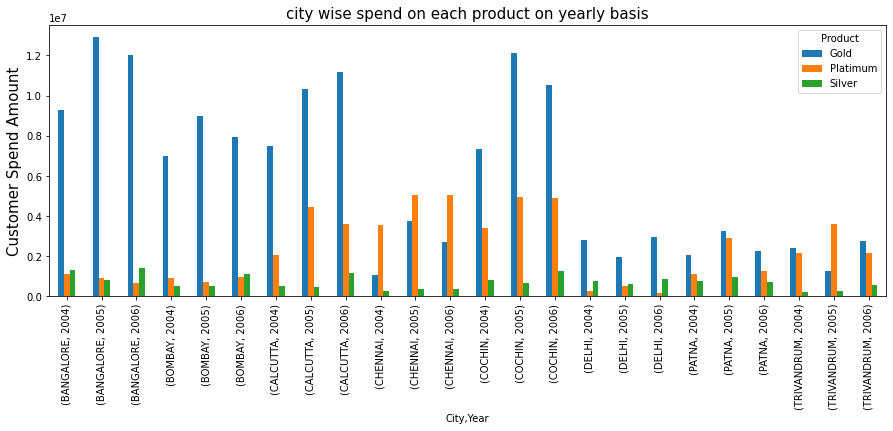

In [33]:
# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

# convert Month column to date format

cust_limt_vs_spend.Month=pd.to_datetime(cust_limt_vs_spend.Month)

# add Year column to dataset

cust_limt_vs_spend['Year']=cust_limt_vs_spend['Month'].apply(lambda x: pd.Timestamp.strftime(x,format="%Y"))

# generating the city wise spend on each product on yearly basis
cust_spend_city_yearwise = pd.pivot_table(data = cust_limt_vs_spend,index=["City","Year"],columns='Product',aggfunc="sum",values="Amount")

# graphical representation

cust_spend_city_yearwise.plot(kind="bar",figsize=(15,5),width=.5)
plt.ylabel("Customer Spend Amount",fontsize=15)
plt.title("city wise spend on each product on yearly basis",fontsize=15)
plt.show()

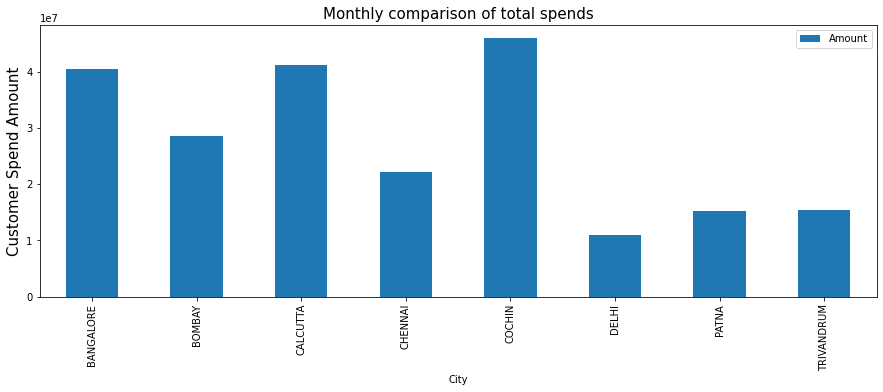

In [34]:
# 4. Create graphs for 
# a. Monthly comparison of total spends, city wise

# generating the Monthly comparison of total spends
cust_spend_citywise = pd.pivot_table(data = cust_limt_vs_spend,index=["City"],aggfunc="sum",values="Amount")
cust_spend_citywise

# graphical representation
cust_spend_citywise.plot(kind="bar",figsize=(15,5),width=.5)
plt.ylabel("Customer Spend Amount",fontsize=15)
plt.title("Monthly comparison of total spends",fontsize=15)
plt.show()

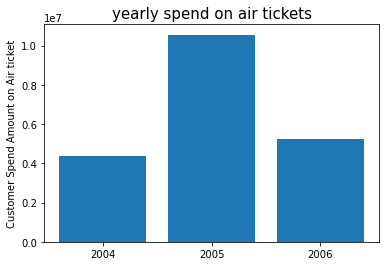

In [35]:
# 4 b. Comparison of yearly spend on air tickets

cust_spend_air_ticket = pd.pivot_table(data = cust_limt_vs_spend,index=["Year","Type"],aggfunc="sum",values="Amount").reset_index()

cust_spend_air_ticket_yearwise=cust_spend_air_ticket.loc[cust_spend_air_ticket.Type=='AIR TICKET']

plt.bar(cust_spend_air_ticket_yearwise["Year"],height=cust_spend_air_ticket_yearwise["Amount"])
plt.ylabel("Customer Spend Amount on Air ticket",fontsize=10)
plt.title("yearly spend on air tickets",fontsize=15)
plt.show()

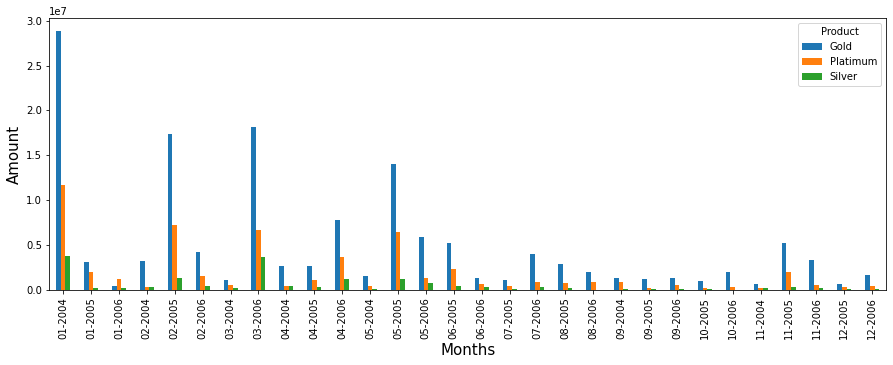

In [36]:
# c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

# add column for month and year
cust_limt_vs_spend['monthly'] =cust_limt_vs_spend.Month.apply(lambda x : pd.Timestamp.strftime(x, format='%m-%Y'))

# monthly spend for each product
product_spend=pd.pivot_table(data=cust_limt_vs_spend,index=["monthly"],columns='Product',values='Amount',aggfunc="sum").sort_values(by='monthly')


# graphical representation
product_spend.plot(kind='bar',figsize=(15,5))
plt.xlabel('Months',fontsize=15)
plt.ylabel('Amount',fontsize=15)
plt.show()

###### Sales are high from Jan to May month especially for Gold and Platimun product types. sale for Gold product is exceptionally high in Jan 2004

In [87]:
# 5. Write user defined PYTHON function to perform the following analysis:
# You need to find top 10 customers for each city in terms of their repayment amount by
# different products and by different time periods i.e. year or month. The user should be able
# to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
# function should automatically take these inputs while identifying the top 10 customers.

cust_repay['Month']=pd.to_datetime(cust_repay.Month)
cust_repay['yearly']=cust_repay.Month.apply(lambda x:x.year)
cust_repay['monthly']=cust_repay.Month.apply(lambda x:x.month)


In [118]:
def Customers_top_ten(product_category,time_period):
    product_category=str(input("Please Enter Product Category in Gold/Silver/Platinum: "))
    time_period=str(input("Please Enter Time Period in yearly/monthly: "))
    return cust_repay.loc[(cust_repay.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)


In [119]:
Customers_top_ten=Customers_top_ten(product_category,time_period)
Customers_top_ten

Please Enter Product Category in Gold/Silver/Platinum: Gold
Please Enter Time Period in yearly/monthly: yearly


,Customer,City,Product,yearly,Amount
64,A61,COCHIN,Gold,2005.0,4276860.55
55,A44,DELHI,Gold,2005.0,4165317.77
58,A45,COCHIN,Gold,2005.0,4042447.57
52,A43,BANGALORE,Gold,2005.0,4006956.60
13,A13,BANGALORE,Gold,2005.0,3757673.00
65,A61,COCHIN,Gold,2006.0,3744127.41
61,A60,CALCUTTA,Gold,2005.0,3742856.10
14,A13,BANGALORE,Gold,2006.0,3477314.89
38,A29,CALCUTTA,Gold,2006.0,3434298.00
35,A28,TRIVANDRUM,Gold,2006.0,3376614.65
